# How does HDBSCAN min cluster parameter affect number of clusters found?
Also visualize clusters found across different values of the parameter

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import pyplot as plt
def figsize(w,h):
    plt.rcParams['figure.figsize']=[w,h]
figsize(15,5) #for big visuals
%config InlineBackend.figure_format = 'retina'
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

def identity(x):
    return x


# palette with many colors, starts w light grey
palette_w_grey = [(0.9, 0.9, 0.9)] + sns.color_palette("deep") + sns.color_palette("Dark2")
palette = sns.color_palette("deep") + sns.color_palette("Dark2")

In [4]:
from IPython.display import clear_output

In [5]:
import ast


def parse_list_of_floats(string):
    try:
        return ast.literal_eval(string)
    except (SyntaxError, ValueError):
        return None

In [ ]:
pam_dataset_path = "../../../pam_dataset_v4/"

cluster_samples = pd.read_csv(
    f"{pam_dataset_path}/per_point_clusters.csv",
    parse_dates=["datetime", "date"],
    converters={"features3d": parse_list_of_floats},
)
cluster_samples["file"] = cluster_samples["clip_name"].apply(
    lambda clip: f"{pam_dataset_path}/audio/{clip}"
)
cluster_samples["start_time"] = 0
cluster_samples["year"] = cluster_samples["date"].apply(lambda x: x.year)

In [7]:
import seaborn as sns

sns.set_palette(["#C6D6D5", "#D0D1AC", "#B6A39E", "#948B89", "#726E75"])

/home/sml161/miniconda3/envs/opso0120/lib/python3.11/site-packages/matplotlib_inline/config.py:68: DeprecationWarning: InlineBackend._figure_format_changed is deprecated in traitlets 4.1: use @observe and @unobserve instead.
  def _figure_format_changed(self, name, old, new):
/tmp/ipykernel_853427/3619815242.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(cluster_counts, x="min_samples", y="n clusters",palette=sns.color_palette())


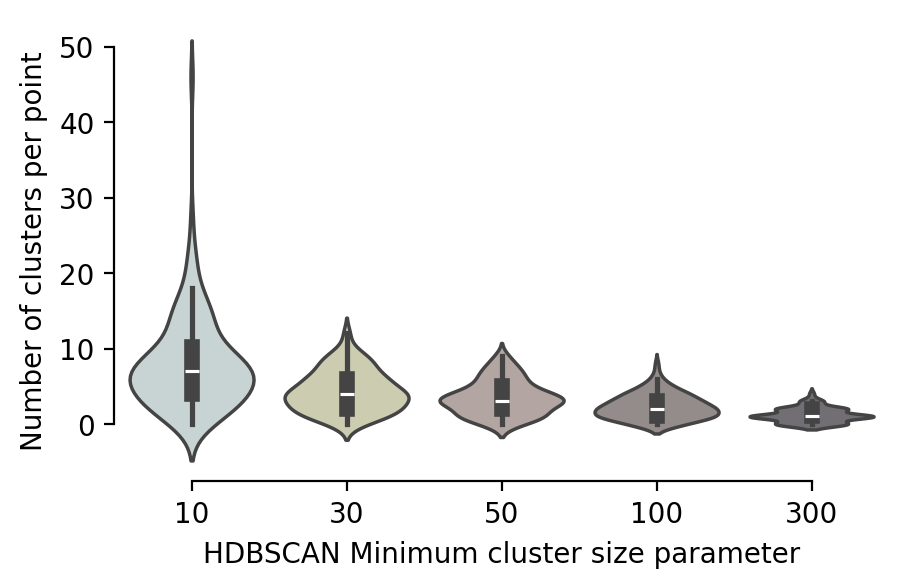

In [ ]:
figsize(5, 3)
cluster_counts = cluster_samples.groupby("point_code")[
    ["cluster_10", "cluster_30", "cluster_50", "cluster_100", "cluster_300"]
].nunique()
import seaborn as sns

sns.set_palette(sns.color_palette())
cluster_counts = cluster_counts.stack().to_frame().reset_index()
cluster_counts.columns = ["point_code", "min_samples", "n clusters"]
cluster_counts["n clusters"] -= 1
sns.violinplot(
    cluster_counts, x="min_samples", y="n clusters", palette=sns.color_palette()
)
plt.xticks([0, 1, 2, 3, 4], [10, 30, 50, 100, 300])
# despine
sns.despine()
# trim axis lines to the data
plt.gca().spines["left"].set_bounds(0, 50)
plt.gca().spines["bottom"].set_bounds(0, 4)
plt.xlabel("HDBSCAN Minimum cluster size parameter")
plt.ylabel("Number of clusters per point")
plt.savefig("../../figures/FigureS3_HDBSCAN_min_cluster_size.pdf")

# inspect embeddings visually, point by point

In [10]:
palette_w_grey = (
    [(0.9, 0.9, 0.9)] + sns.color_palette("deep") + sns.color_palette("Dark2")
)

RK062: 6 clusters


/tmp/ipykernel_853427/3979932747.py:17: UserWarning: The palette list has more values (19) than needed (7), which may not be intended.
  sns.scatterplot(
/tmp/ipykernel_853427/3979932747.py:24: UserWarning: The palette list has more values (19) than needed (6), which may not be intended.
  sns.scatterplot(


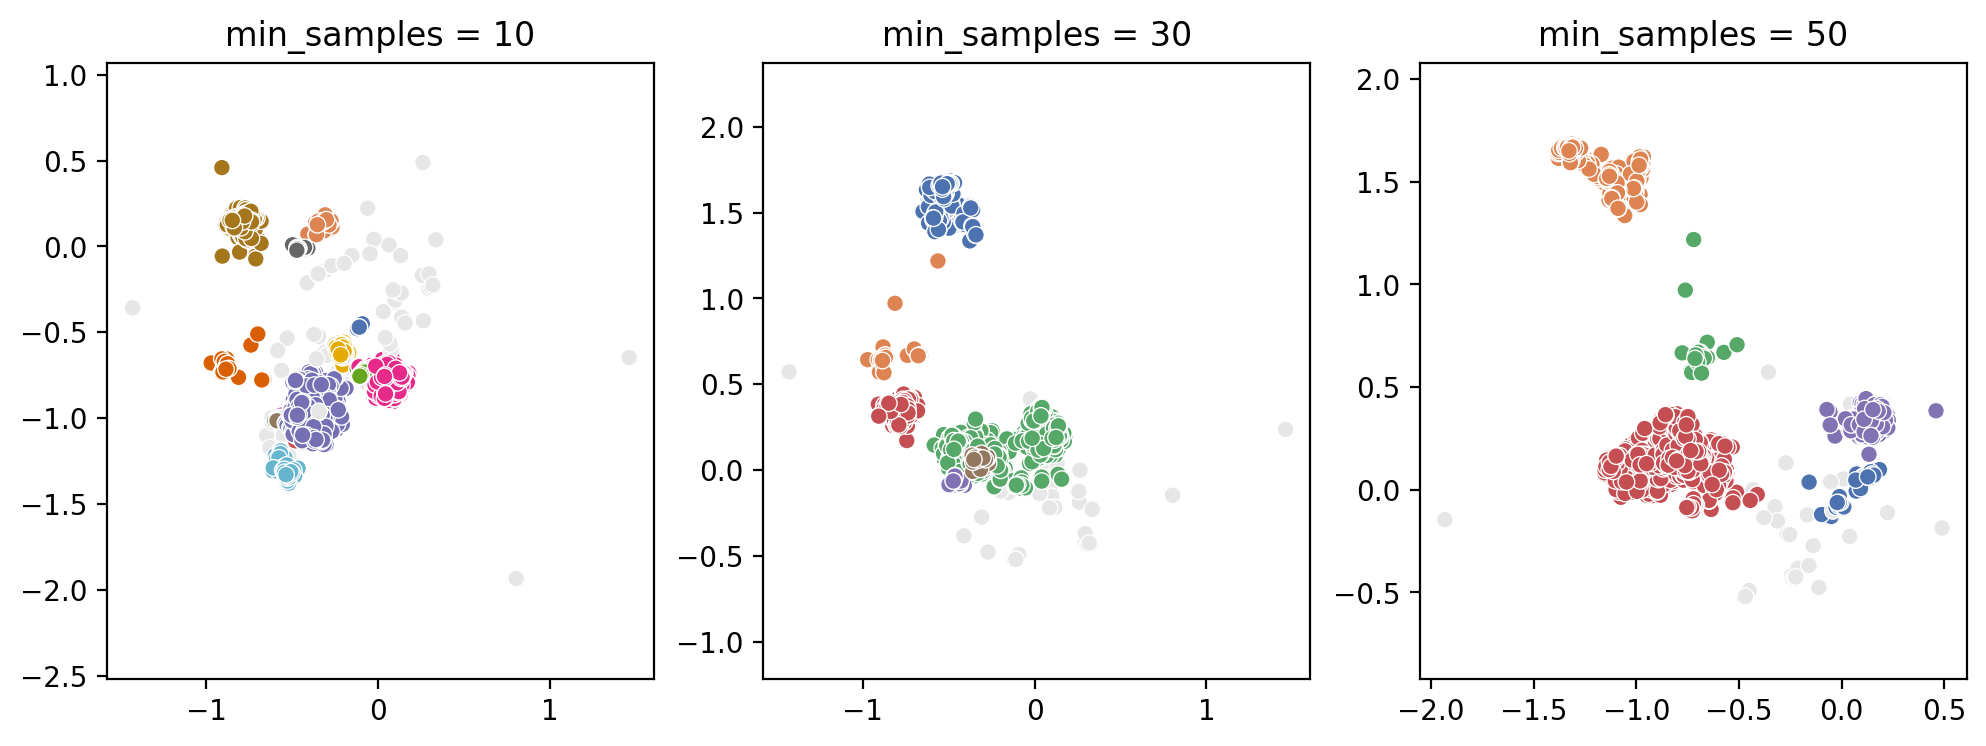

In [15]:
from IPython.display import clear_output
import seaborn as sns

figsize(12, 4)
for cluster, samples in cluster_samples.groupby("point_code"):
    print(f"{cluster}: {samples.cluster_30.nunique()-1} clusters")
    samples.sort_values(by="cluster_30", inplace=True)
    feat = np.vstack(samples.features3d.values)
    fig, axs = plt.subplots(1, 3)
    sns.scatterplot(
        ax=axs[0],
        x=feat[:, 0],
        y=feat[:, 1],
        hue=samples["cluster_10"].values,
        palette=palette_w_grey,
    )
    sns.scatterplot(
        ax=axs[1],
        x=feat[:, 0],
        y=feat[:, 2],
        hue=samples["cluster_30"].values,
        palette=palette_w_grey,
    )
    sns.scatterplot(
        ax=axs[2],
        x=feat[:, 1],
        y=feat[:, 2],
        hue=samples["cluster_50"].values,
        palette=palette_w_grey,
    )
    axs[0].set_title("min_samples = 10")
    axs[1].set_title("min_samples = 30")
    axs[2].set_title("min_samples = 50")
    for ax in axs:
        ax.axis("equal")
        ax.legend_.remove()
    plt.show()
    if input("x to exit") == "x":
        break
    clear_output()